In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

# DATA DESCRIPTION: 
# ================
# crim: per capita crime rate by town.
# zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# indus: proportion of non-retail business acres per town.
# chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# nox: nitrogen oxides concentration (parts per 10 million).
# rm: average number of rooms per dwelling.
# age: proportion of owner-occupied units built prior to 1940.
# dis: weighted mean of distances to five Boston employment centres.
# rad: index of accessibility to radial highways.
# tax: full-value property-tax rate per \$10,000.
# ptratio: pupil-teacher ratio by town.
# black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# lstat: lower status of the population (percent).
# medv (Target value ): median value of owner-occupied homes in \$1000s.

In [25]:
DATASET_PATH= "./datasets/boston-housing-dataset/datasets_1815_3139_housing.csv"

df = pd.read_csv(DATASET_PATH, sep="\s+")
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
df.columns = column_names
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [26]:
#Train 80%, valid 20%
train_ratio = 0.8
train_length = int(len(train_df) * train_ratio)
train_df = df[: train_length]
valid_df = df[train_length:]

print("Train : ", train_df.shape)
print("Valid : ", valid_df.shape)

Train :  (258, 14)
Valid :  (247, 14)


In [27]:
train_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.471948,12.269380,9.406279,0.077519,0.519772,6.352907,65.274806,4.199231,4.558140,320.267442,17.872868,376.862481,11.269574,24.579070
std,0.709539,24.558239,6.586958,0.267934,0.110699,0.691095,29.142283,1.984589,1.645212,69.834394,2.184318,46.279570,6.383892,8.608644
min,0.013110,0.000000,0.460000,0.000000,0.392000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.073425,0.000000,4.860000,0.000000,0.439000,5.889500,39.250000,2.560025,4.000000,276.000000,16.450000,379.057500,6.377500,19.225000
50%,0.146710,0.000000,7.470000,0.000000,0.504000,6.170500,72.050000,3.792550,4.000000,307.000000,17.900000,391.935000,10.140000,22.550000
75%,0.534483,16.250000,12.325000,0.000000,0.547000,6.630750,92.550000,5.713025,5.000000,398.000000,19.100000,395.587500,14.685000,27.875000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     258 non-null    float64
 1   zn       258 non-null    float64
 2   indus    258 non-null    float64
 3   chas     258 non-null    int64  
 4   nox      258 non-null    float64
 5   rm       258 non-null    float64
 6   age      258 non-null    float64
 7   dis      258 non-null    float64
 8   rad      258 non-null    int64  
 9   tax      258 non-null    float64
 10  ptratio  258 non-null    float64
 11  black    258 non-null    float64
 12  lstat    258 non-null    float64
 13  medv     258 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 28.3 KB


Text(0.5, 1.0, 'Corr matrix')

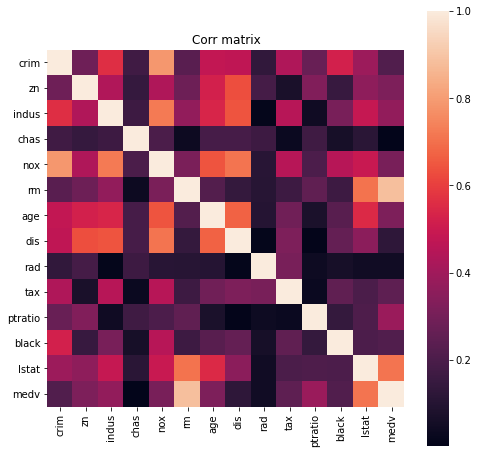

In [31]:
corr_matrix = np.abs(train_df.corr())
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, square=True).set_title("Corr matrix")

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [34]:
X_train = train_df.drop("medv", axis=1)
y_train = train_df["medv"]

X_valid = valid_df.drop("medv", axis=1)
y_valid = valid_df["medv"]

In [44]:
def measure(name, y_pred, y_true):
    print("========================")
    print("CLF ", name)
    print("Root mean squared error ", mean_squared_error(y_pred, y_true, squared=False))
    
def run_clf(clf, X_train, y_train, X_test, y_test, clf_name= None, measure_function=measure):
    clf.fit(X_train, y_train)
    if measure is not None:
        if clf_name is not None:
            name = clf_name
        else:
            name = clf.__class__.__name__
        measure(name, clf.predict(X_test), y_test)
    else:
        return clf.predict(X_test, y_test)
    
sgd = make_pipeline(StandardScaler(), SGDRegressor())
svr = make_pipeline(StandardScaler(), SVR(epsilon=0.2))
tree = DecisionTreeRegressor()
scaled_tree = make_pipeline(StandardScaler(), DecisionTreeRegressor())
forest = RandomForestRegressor()
scaled_forest = make_pipeline(StandardScaler(), RandomForestRegressor())
xgb = XGBRegressor()
scaled_xgb = make_pipeline(StandardScaler(), XGBRegressor())


run_clf(sgd, X_train, y_train, X_valid, y_valid, clf_name="SGD")
run_clf(svr, X_train, y_train, X_valid, y_valid, clf_name="SVR")
run_clf(tree, X_train, y_train, X_valid, y_valid, clf_name="Decision Tree")
run_clf(scaled_tree, X_train, y_train, X_valid, y_valid, clf_name="Scaled Decision Tree")
run_clf(forest, X_train, y_train, X_valid, y_valid, clf_name="Forest")
run_clf(scaled_forest, X_train, y_train, X_valid, y_valid, clf_name="Scaled Forest")
run_clf(xgb, X_train, y_train, X_valid, y_valid, clf_name="XGB")
run_clf(scaled_xgb, X_train, y_train, X_valid, y_valid, clf_name="Scaled XGB")


CLF  SGD
Root mean squared error  16.504221796412224
CLF  SVR
Root mean squared error  9.106162789799022
CLF  Decision Tree
Root mean squared error  7.083304199352644
CLF  Scaled Decision Tree
Root mean squared error  6.80577570861334
CLF  Forest
Root mean squared error  5.916534927008383
CLF  Scaled Forest
Root mean squared error  5.883524585017905
CLF  XGB
Root mean squared error  5.767227798756943
CLF  Scaled XGB
Root mean squared error  5.7672573053132075


In [37]:
predicted_values = forest.predict(X_valid)
print(predicted_values)

[30.614 33.554 47.67  48.899 33.578 33.704 21.29  30.946 48.779 46.668
 21.379 21.132 26.006 25.987 45.567 28.707 29.863 34.057 29.882 24.26
 31.882 48.502 34.48  48.799 45.455 32.575 25.496 25.613 23.697 23.277
 25.462 29.35  34.46  27.774 22.908 21.56  27.656 26.062 20.684 25.43
 33.67  30.661 25.789 23.419 33.252 32.97  29.212 33.64  29.806 28.655
 22.876 19.886 24.124 20.815 23.843 27.486 20.496 18.11  20.431 22.744
 21.826 23.728 23.756 23.014 19.281 24.25  25.097 24.477 20.482 22.143
 23.825 22.992 20.316 23.041 25.971 25.284 24.309 21.537 20.993 23.833
 23.187 22.874 33.123 28.731 28.003 30.995 21.025 20.196 24.898 29.526
 31.712 25.725 29.084 23.802 30.334 23.595 23.899 16.676 19.073 19.971
 19.793 23.34  19.307 20.022 17.222 47.807 21.878 17.8   17.679 22.457
 28.181 34.08  22.728 21.285 13.269 13.269 32.788 15.262 20.398 15.004
 14.966 29.669 15.771 14.775 14.774 14.678 14.465 13.682 15.58  13.969
 14.483 16.04  15.841 14.309 18.18  16.202 16.594 16.28  14.854 14.719
 16.41  